# Identification of Cluster of Clusters

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy import stats
import os
from glob import glob
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
import joblib


# Identification of Larger Cluster Groups with the KMEANs Data

note this notebook will work off of the UMAP, KMEANS applied dataframe from the 'UMAP_KMEANS' notebook

In [ ]:
data=pd.read_csv('\\Path to preprocessed data csv with UMAP and KMEANS\\')
#first sort out the parameters of interest
cols=['AreaShape_Area', 'AreaShape_BoundingBoxArea', 'AreaShape_Compactness',
       'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter',
       'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor',
       'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter',
       'AreaShape_MaximumRadius', 'AreaShape_MeanRadius',
       'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter',
       'AreaShape_MinorAxisLength', 'AreaShape_Perimeter',
       'AreaShape_Solidity', 'Cytoplasm_AreaShape_Area',
       'Cytoplasm_AreaShape_BoundingBoxArea',
       'Cytoplasm_AreaShape_Compactness', 'Cytoplasm_AreaShape_Eccentricity',
       'Cytoplasm_AreaShape_EquivalentDiameter', 'Cytoplasm_AreaShape_Extent',
       'Cytoplasm_AreaShape_FormFactor', 'Cytoplasm_AreaShape_MajorAxisLength',
       'Cytoplasm_AreaShape_MaxFeretDiameter',
       'Cytoplasm_AreaShape_MaximumRadius', 'Cytoplasm_AreaShape_MeanRadius',
       'Cytoplasm_AreaShape_MedianRadius',
       'Cytoplasm_AreaShape_MinFeretDiameter',
       'Cytoplasm_AreaShape_MinorAxisLength', 'Cytoplasm_AreaShape_Perimeter',
       'Cytoplasm_AreaShape_Solidity']
working_data=DF[cols] # sort out the morphological parameters that we will use for the UMAP parameters

In [ ]:
# now lets create the standard scaled morphological data
# import log and standard scale

working_data=np.log10(working_data)
scX=joblib.load(r"\\path to standard scaled model\\")
working_data=scX.transform(working_data)
CCG=pd.DataFrame(data_treat, columns=cols) # create a  new dataframe with the transformed data
CCG['KMEANS']=data['KMEANS']# add thhe KMEANS collumn from the previous dataframe (note these were numerically adjusted )

KMEANS_DICTIONARY={}
for i in np.unique(CCG['KMEANS']):
    KMEANS_Sorted=CCG[CCG['KMEANS']==i] # KMEANS sorted 
    KMEANS_DICTIONARY[i]=[]
    # now we will sort through the columns
    for j in cols:
        KMEANS_DICTIONARY[i].append(np.average(KMEANS_Sorted[j]))# add the sorted column
# above will add the average expression of each morphological parameter as a dictionary readout for each KMEANS group

d=pd.DataFrame.from_dict(KMEANS_DICTIONARY);d=d.T;d.columns=cols;d=d.T # housekeeping to get a dataframe structure that is good for graphing



# Clustering KMEANS groups based on morphological expression

To get overlapping KMEANS groups, we just need to see how they cluster absed on morphological expression and then have the CCGs!

[Text(1, 0.5, 'AreaShape_Area'),
 Text(1, 1.5, 'AreaShape_BoundingBoxArea'),
 Text(1, 2.5, 'AreaShape_Compactness'),
 Text(1, 3.5, 'AreaShape_Eccentricity'),
 Text(1, 4.5, 'AreaShape_EquivalentDiameter'),
 Text(1, 5.5, 'AreaShape_EulerNumber'),
 Text(1, 6.5, 'AreaShape_Extent'),
 Text(1, 7.5, 'AreaShape_FormFactor'),
 Text(1, 8.5, 'AreaShape_MajorAxisLength'),
 Text(1, 9.5, 'AreaShape_MaxFeretDiameter'),
 Text(1, 10.5, 'AreaShape_MaximumRadius'),
 Text(1, 11.5, 'AreaShape_MeanRadius'),
 Text(1, 12.5, 'AreaShape_MedianRadius'),
 Text(1, 13.5, 'AreaShape_MinFeretDiameter'),
 Text(1, 14.5, 'AreaShape_MinorAxisLength'),
 Text(1, 15.5, 'AreaShape_Perimeter'),
 Text(1, 16.5, 'AreaShape_Solidity'),
 Text(1, 17.5, 'Cytoplasm_AreaShape_Area'),
 Text(1, 18.5, 'Cytoplasm_AreaShape_BoundingBoxArea'),
 Text(1, 19.5, 'Cytoplasm_AreaShape_Compactness'),
 Text(1, 20.5, 'Cytoplasm_AreaShape_Eccentricity'),
 Text(1, 21.5, 'Cytoplasm_AreaShape_EquivalentDiameter'),
 Text(1, 22.5, 'Cytoplasm_AreaShape_Ext

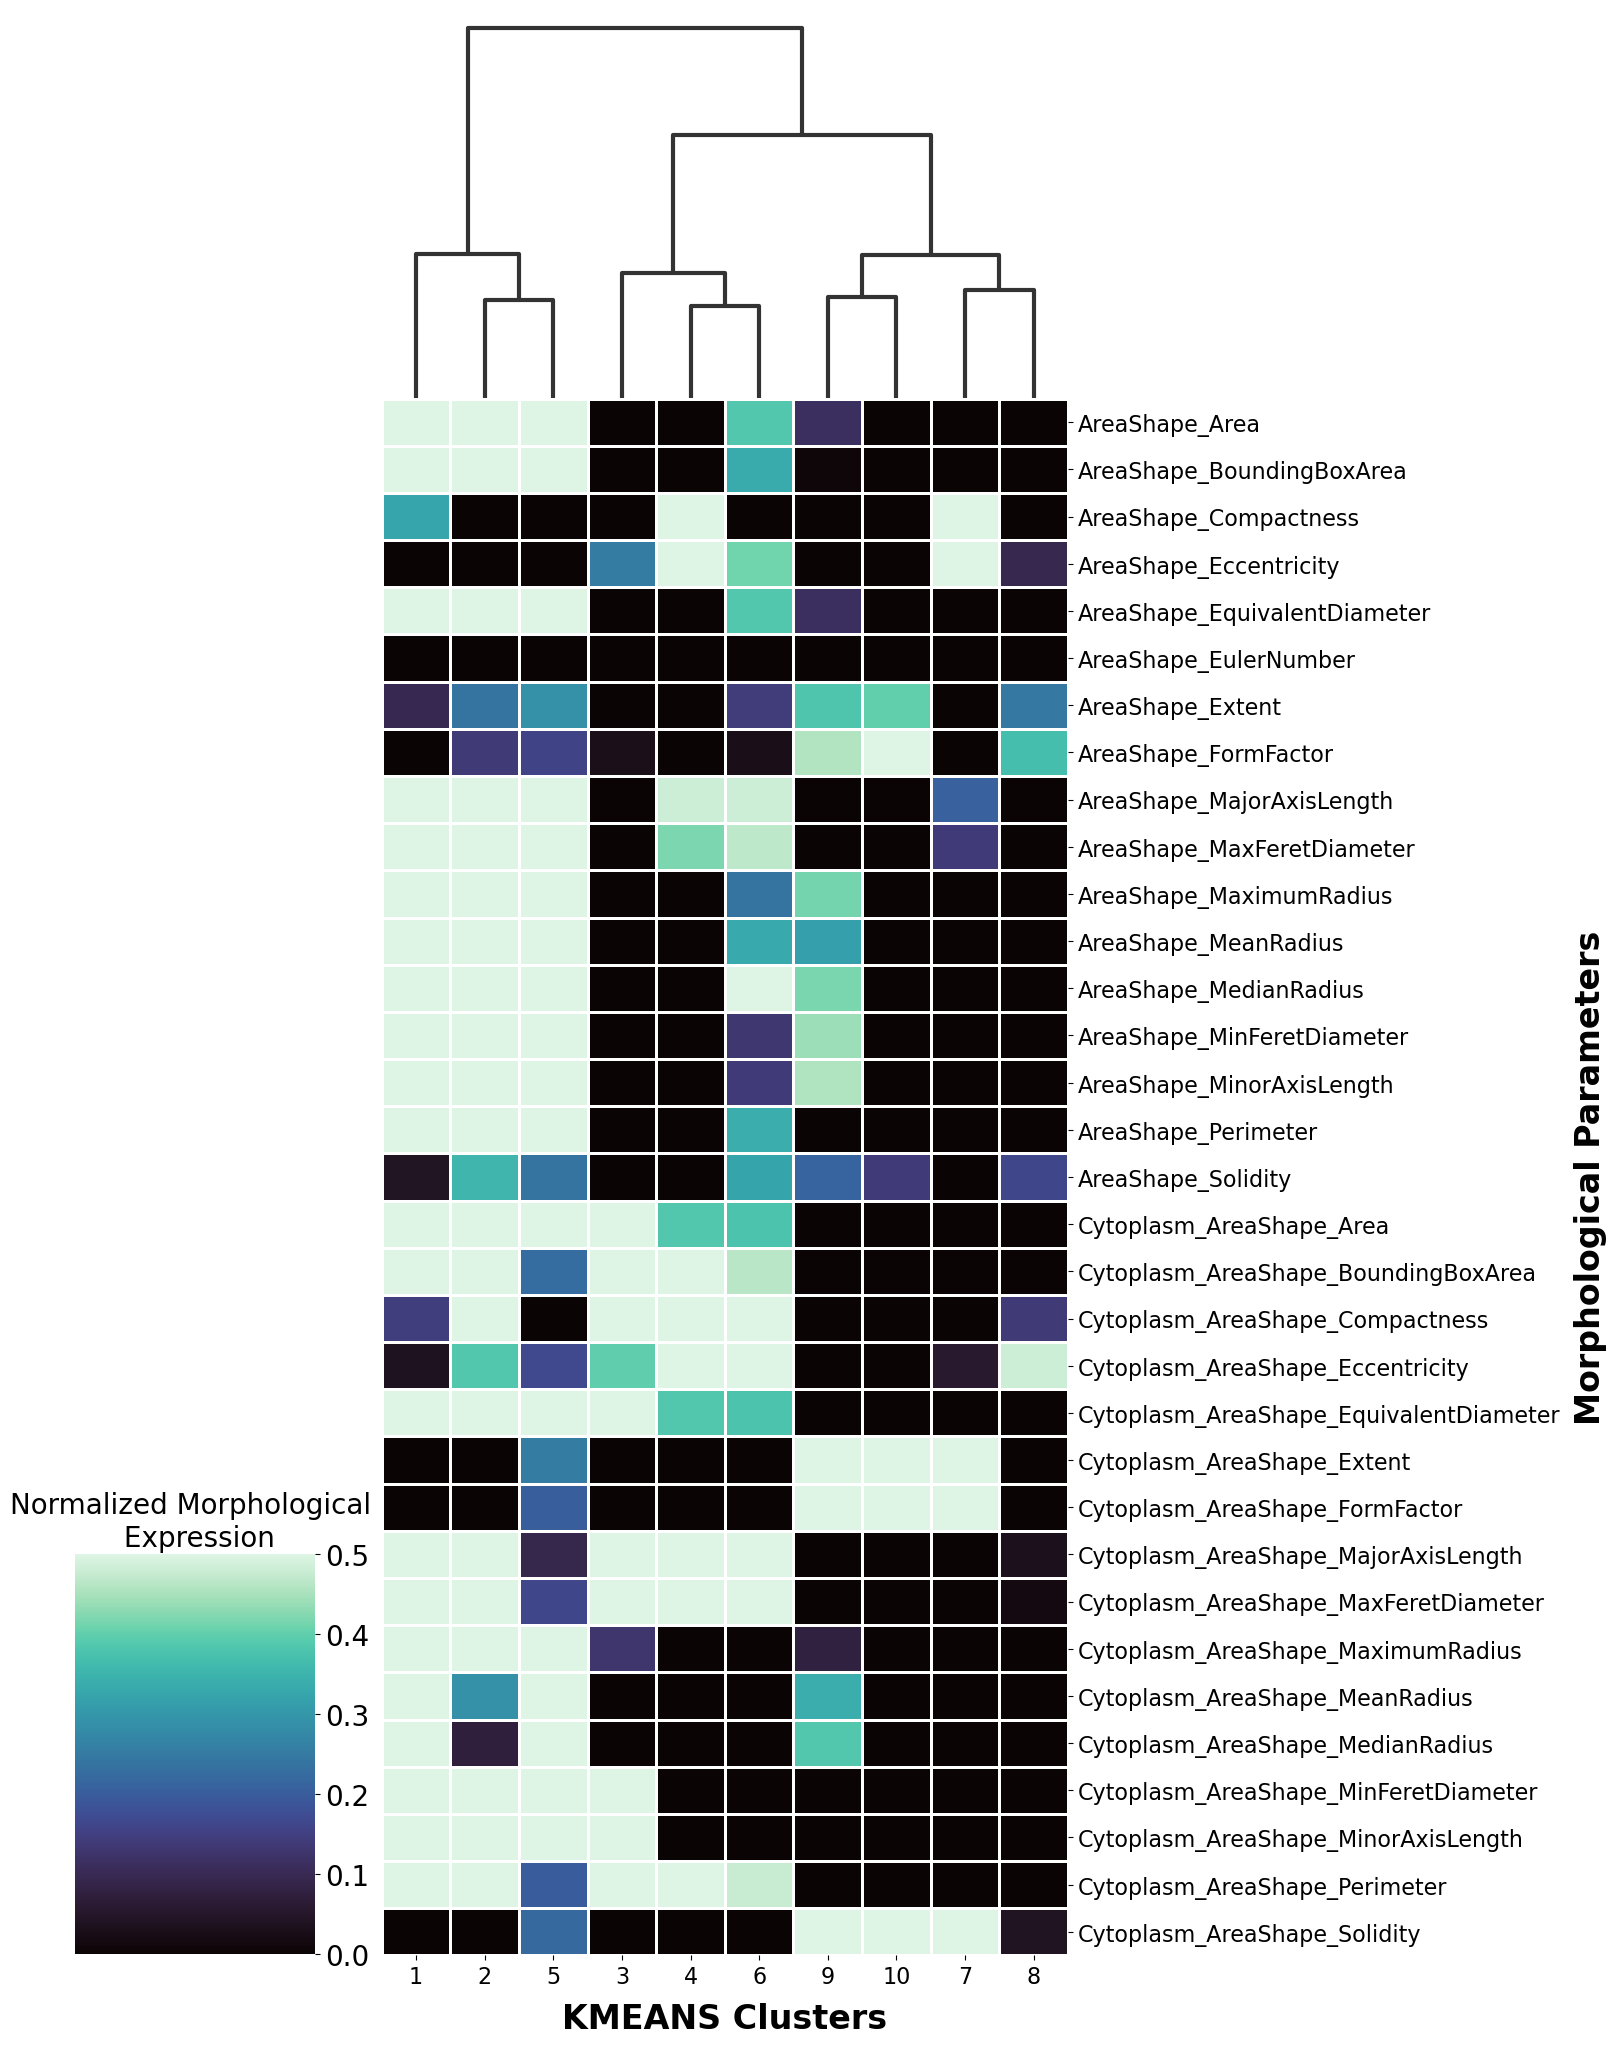

In [57]:
Clustering= sns.clustermap(d,figsize=(12, 20),
                           method='ward',vmin=0,vmax=0.5, col_cluster=True,row_cluster=False, cmap='mako',linewidths=2,cbar_kws={"orientation": "vertical"})
                          
                          
                          
for a in Clustering.ax_col_dendrogram.collections:
    a.set_linewidth(3)
Clustering.ax_cbar.set_position((-0.1, 0.02, .2, 0.2))
Clustering.ax_cbar.set_title('Normalized Morphological \n Expression')

ax = Clustering.ax_heatmap
ax.set_xlabel("KMEANS Clusters", fontsize = 24,labelpad=10,weight='bold')
ax.set_ylabel("Morphological Parameters", fontsize = 24,labelpad=10,weight='bold')



Clustering.figure.axes[-1].title.set_size(20)
Clustering.figure.axes[-1].tick_params(labelsize=20)



Clustering.cax.set_visible(True)
Clustering.ax_heatmap.set_xticklabels(Clustering.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
Clustering.ax_heatmap.set_yticklabels(Clustering.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

In [58]:
Clustering.savefig(r'C:\Users\Jude\OneDrive - Johns Hopkins\Desktop\Contreras\April 2022 Slides\11_21_22 Rerun\April 2023 final figures\figures\Cluster of Clusters.png',dpi=300, bbox_inches='tight')
